In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.

In [3]:
fruits.shape

(59, 7)

In [4]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [5]:
fruits.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

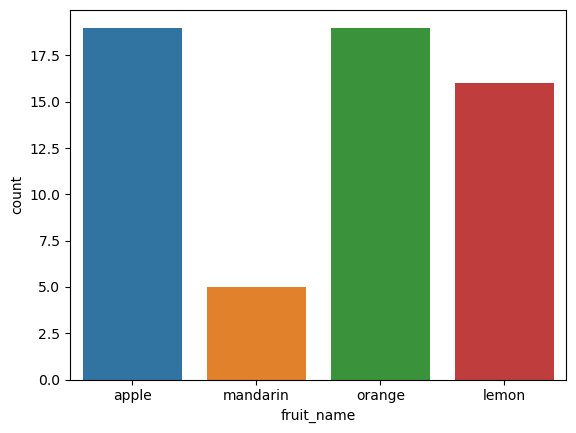

In [6]:
sns.countplot(x = fruits.fruit_name, label = "Count", data = fruits)
plt.show()

## Visualization

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

In [7]:
fruit = fruits.drop('fruit_label', axis=1)

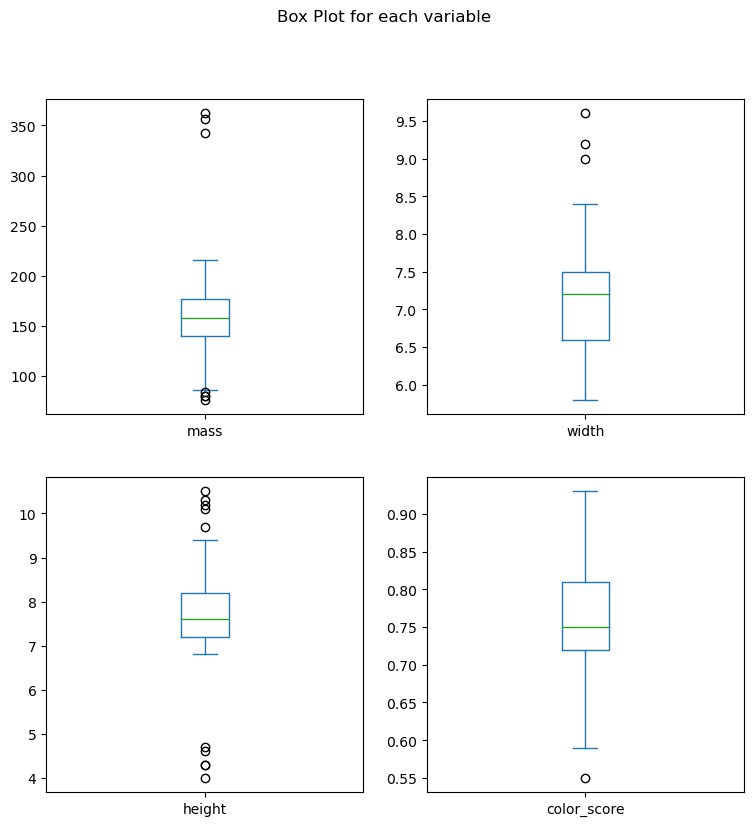

In [8]:
fruit.plot(kind='box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (9,9), title = 'Box Plot for each variable')
plt.savefig('fruits_box')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

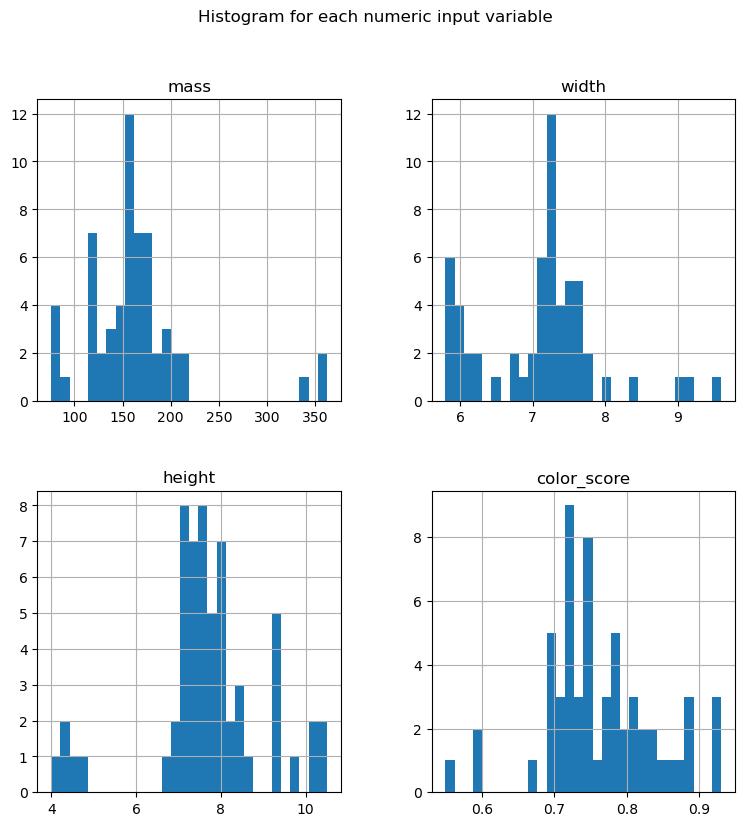

In [9]:
import pylab as pl
fruit.hist(bins=30, figsize=(9,9))
pl.suptitle('Histogram for each numeric input variable')
plt.savefig('fruits_hist')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

C:\Users\kushw\AppData\Local\Temp\ipykernel_9832\1228309692.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


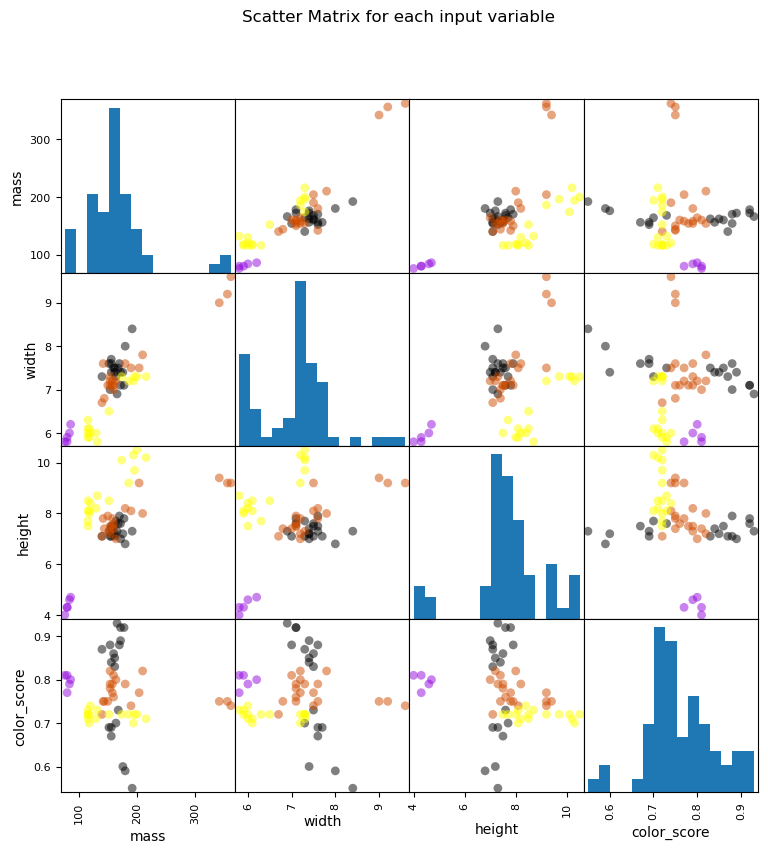

In [10]:
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s = 40, hist_kwds = {'bins':15}, figsize = (9,9), cmap = cmap)
plt.suptitle('Scatter Matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

## Statistical Summary

In [11]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

## Training & Test Sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODELS

### 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.71
Accuracy of Logistic regression classifier on test set: 0.61


In [15]:
pred_log = log.predict(X_test)

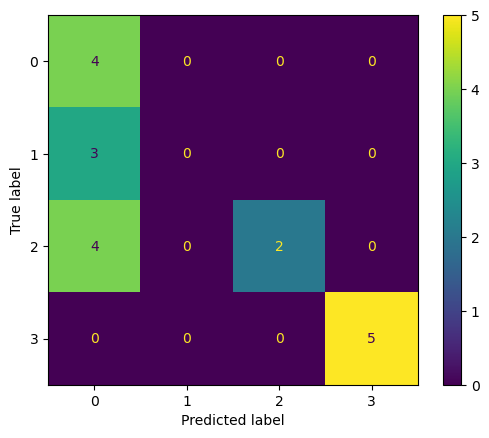

In [16]:
cm_log = confusion_matrix(y_test, pred_log)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_log)
cm_display.plot()
plt.show()

In [17]:
print(classification_report(y_test, pred_log, zero_division = 0))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         3
           3       1.00      0.33      0.50         6
           4       1.00      1.00      1.00         5

    accuracy                           0.61        18
   macro avg       0.59      0.58      0.51        18
weighted avg       0.69      0.61      0.56        18



### 2. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


In [19]:
pred_tree = tree.predict(X_test)

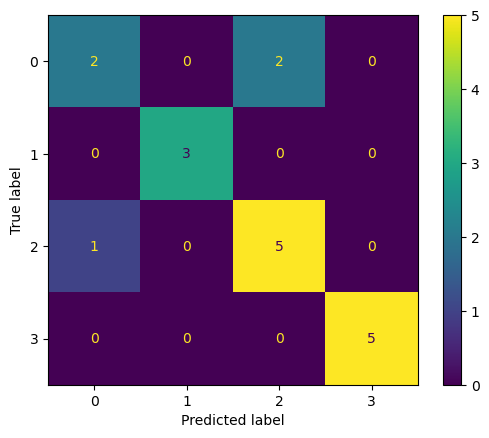

In [20]:
cm_tree = confusion_matrix(y_test, pred_tree)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
cm_display.plot()
plt.show()

In [21]:
print(classification_report(y_test, pred_tree, zero_division = 0))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00         3
           3       0.71      0.83      0.77         6
           4       1.00      1.00      1.00         5

    accuracy                           0.83        18
   macro avg       0.85      0.83      0.84        18
weighted avg       0.83      0.83      0.83        18



### 3. K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.78


In [23]:
pred_knn = knn.predict(X_test)

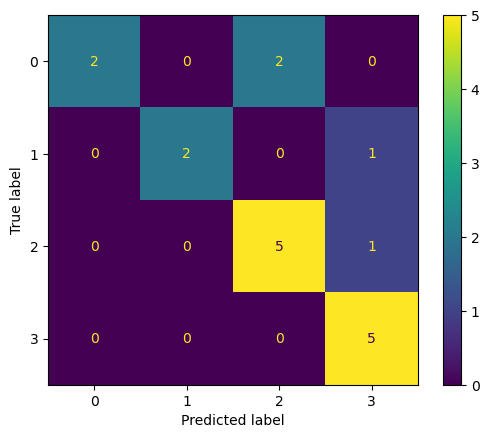

In [24]:
cm_knn = confusion_matrix(y_test, pred_knn)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
cm_display.plot()
plt.show()

In [25]:
print(classification_report(y_test, pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       1.00      0.67      0.80         3
           3       0.71      0.83      0.77         6
           4       0.71      1.00      0.83         5

    accuracy                           0.78        18
   macro avg       0.86      0.75      0.77        18
weighted avg       0.83      0.78      0.77        18



### 4. Linear Discriminant Analysis

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.80
Accuracy of LDA classifier on test set: 0.89


In [27]:
pred_lda = lda.predict(X_test)

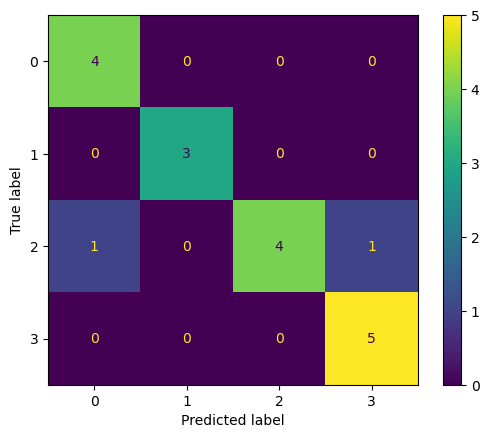

In [28]:
cm_lda = confusion_matrix(y_test, pred_lda)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_lda)
cm_display.plot()
plt.show()

In [29]:
print(classification_report(y_test, pred_lda, zero_division = 0))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         6
           4       0.83      1.00      0.91         5

    accuracy                           0.89        18
   macro avg       0.91      0.92      0.90        18
weighted avg       0.91      0.89      0.88        18



### 5. Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
      .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.83
Accuracy of GNB classifier on test set: 0.83


In [31]:
pred_gnb = gnb.predict(X_test)

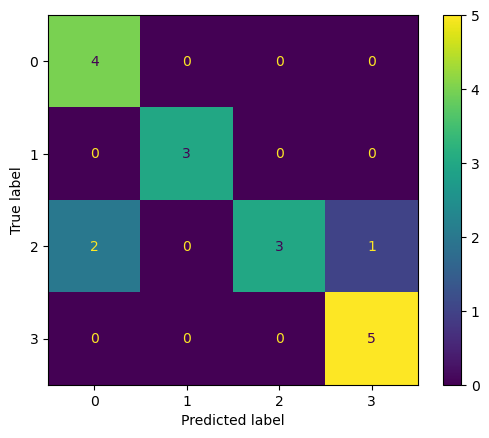

In [32]:
cm_gnb = confusion_matrix(y_test, pred_gnb)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_test, pred_gnb, zero_division = 0))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         6
           4       0.83      1.00      0.91         5

    accuracy                           0.83        18
   macro avg       0.88      0.88      0.84        18
weighted avg       0.88      0.83      0.82        18



### 6. Support Vector Machine

In [34]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.95
Accuracy of SVM classifier on test set: 0.89


In [35]:
pred_svm = svm.predict(X_test)

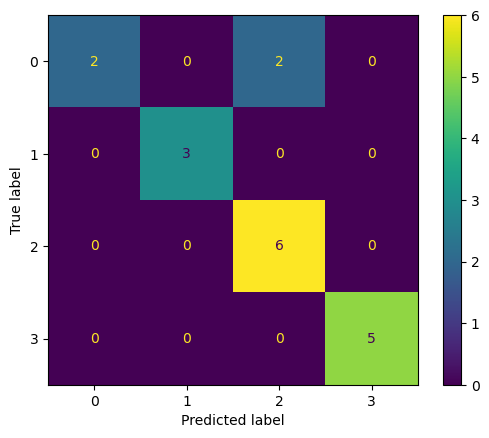

In [36]:
cm_svm = confusion_matrix(y_test, pred_svm)
cm_display  = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
cm_display.plot()
plt.show()

In [37]:
print(classification_report(y_test, pred_svm, zero_division = 0))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00         5

    accuracy                           0.89        18
   macro avg       0.94      0.88      0.88        18
weighted avg       0.92      0.89      0.88        18



The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

### Plot the Decision Boundary of the k-NN Classifier

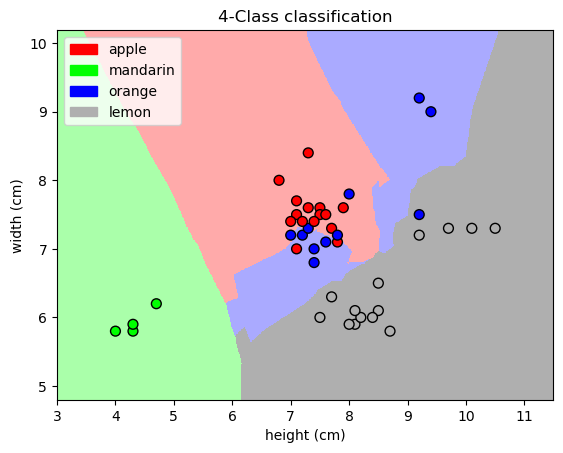

In [38]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()
    
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification")    
    plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x28522aeaf20>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

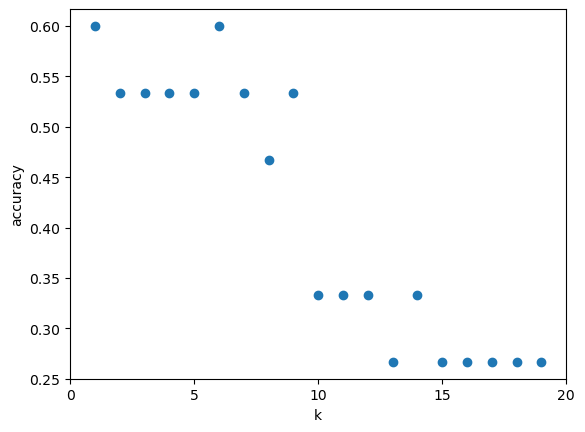

In [39]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])